In [1]:
'''
this notebook illustrates the posterior structure for a a correlated gaussian noise stemming from
a projection of white noise via an exponentially decaying kernel and an optional observation noise.
'''


'\nthis notebook illustrates the posterior structure for a a correlated gaussian noise stemming from\na projection of white noise via an exponentially decaying kernel and an optional observation noise.\n'

In [39]:

import numpy as np
import matplotlib.pyplot as plt

observation_sigmas = [0.1, 1, 10]
decay_coeffs = [0.5, 0.99]
n_samples = 100
tries_per_setting = 3
posterior_covariance_matrices = {}
for p1, decay_coeff in enumerate(decay_coeffs):
    for p2, observation_sigma in enumerate(observation_sigmas):
        key = (p1, p2)

        projection_matrix = np.sum([decay_coeff**i * np.diag(np.ones(n_samples - i), -i) for i in range(n_samples)], axis=0)
        prior_covariance_matrix = projection_matrix @ projection_matrix.T

        for _ in range(tries_per_setting):
            observation_noise = observation_sigma * np.random.normal(size=n_samples)

            posterior_covariance_matrix = np.linalg.inv(np.linalg.inv(prior_covariance_matrix) + np.eye(n_samples) / observation_sigma**2)
            posterior_covariance_matrices[key] = posterior_covariance_matrix



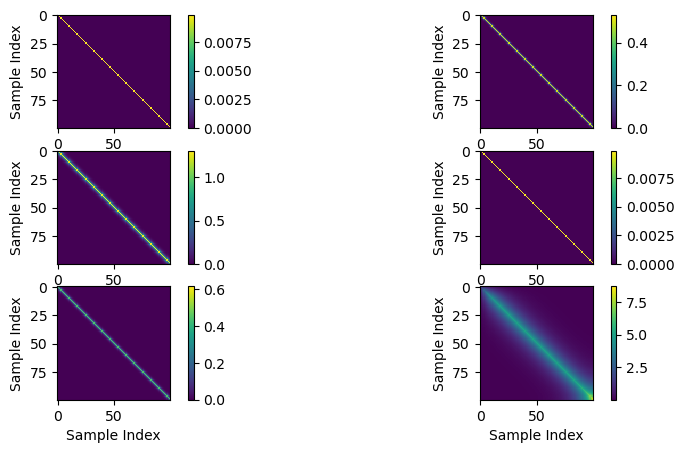

In [43]:
plt.figure(figsize=(10, 5))

for i, (key, matrices) in enumerate(posterior_covariance_matrices.items()):
    plt.subplot(3, 2, i + 1)
    plt.imshow(matrices, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    # plt.title(f'Posterior Covariance Matrix for decay_coeff={decay_coeffs[key[0]]}, observation_sigma={observation_sigmas[key[1]]}')
    plt.xlabel('Sample Index')
    plt.ylabel('Sample Index')
    # plt.show()